In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
#importing libraries for this project

In [49]:
years = ['2018A', '2019B', '2020P','2021P','2022P','2023P']
sales = pd.Series(index=years)
sales['2018A']= 31.0
sales

/var/folders/jn/dq9nsm0s38gdygdpqgdxw_200000gn/T/ipykernel_1317/192026641.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sales = pd.Series(index=years)


2018A    31.0
2019B     NaN
2020P     NaN
2021P     NaN
2022P     NaN
2023P     NaN
dtype: float64

In [50]:
#created to form a data structure with an index consisting of years

In [51]:
#The 'NaN' shown here is "Not a Number" , empty cells for projection.
#The fourth line of this cells (sales) will print a representation of the data. 
#This will enable us to have a sensible representation of it by typing the variable in interactive intepreter. 


In [52]:
#Forming data structure with an index consisting of years
#A stands for Actual
#B stands for Budget
#P stands for Projected


In [53]:
growth_rate = 0.1
for year in range(1, 6):
    sales[year] = sales[year - 1] * (1 + growth_rate)
    
sales

2018A    31.00000
2019B    34.10000
2020P    37.51000
2021P    41.26100
2022P    45.38710
2023P    49.92581
dtype: float64

In [54]:
#ebit stands for earning before interest and taxes
#ebitda stands for earning before interest, taxes, depreciation and armotization

In [55]:
ebitda_margin = 0.14
depr_percent = 0.032
ebitda = sales * ebitda_margin
depreciation = sales * depr_percent
ebit = ebitda - depreciation 

In [59]:
nwc_percent = 0.24
nwc = sales * nwc_percent
change_in_nwc = nwc.shift(1) - nwc
capex_percent = depr_percent
capex = -(sales * capex_percent)
tax_rate = 0.25
tax_payment = -ebit * tax_rate
tax_payment = tax_payment.apply(lambda x: min(x,0))
free_cash_flow = ebit + depreciation + tax_payment + capex + change_in_nwc
free_cash_flow

2018A         NaN
2019B    2.018100
2020P    2.219910
2021P    2.441901
2022P    2.686091
2023P    2.954700
dtype: float64

In [60]:
cost_of_capital = 0.12
terminal_growth = 0.02 
terminal_value = ((free_cash_flow[-1] * (1 + terminal_growth)) /
                  (cost_of_capital - terminal_growth))
discount_factors = [(1 / (1 + cost_of_capital)) ** i for i in range (1,6)]
dcf_value = (sum(free_cash_flow[1:] * discount_factors) + 
            terminal_value * discount_factors[-1])
dcf_value


25.79438401113792

In [61]:
output = pd.DataFrame([sales, ebit, free_cash_flow],
                     index=['Sales', 'EBIT', 'Free Cash Flow']).round(1)
output.to_excel('Python DCF Model Output.xlsx')
output

,2018A,2019B,2020P,2021P,2022P,2023P
Sales,31.0,34.1,37.5,41.3,45.4,49.9
EBIT,3.3,3.7,4.1,4.5,4.9,5.4
Free Cash Flow,NaN,2.0,2.2,2.4,2.7,3.0


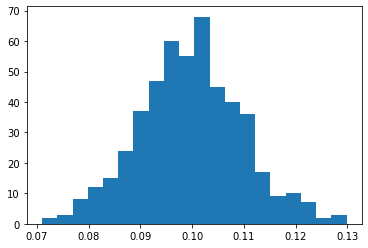

In [66]:
iterations = 500 
sales_growth_dist = np.random.normal(loc= 0.1, scale=0.01, size =iterations)
ebitda_margin_dist = np.random.normal(loc=0.14, scale=0.02, size =iterations)
nwc_percent_dist = np.random.normal(loc=0.24, scale=0.01, size =iterations)
plt.hist(sales_growth_dist, bins=20)
plt.show()

In [69]:
def run_mcs():
    
    #create probability distributions 
    sales_growth_dist = np.random.normal(loc= 0.1, scale=0.01, size =iterations)
    ebitda_margin_dist = np.random.normal(loc=0.14, scale=0.02, size =iterations)
    nwc_percent_dist = np.random.normal(loc=0.24, scale=0.01, size =iterations)
    
    #calculate DCF value for each set of random inputs
    output_distribution = []
    for i in range(iterations):
        for year in range(1,6):
            sales[year] = sales [year - 1] * (1 + sales_growth_dist[0])
        ebitda = sales * ebitda_margin_dist[i]
        depreciation = (sales * depr_percent)
        ebit = ebitda - depreciation
        nwc = sales * nwc_percent_dist[i]
        change_in_nwc = nwc.shift(1) - nwc
        capex = -(sales * capex_percent)
        tax_payment = -ebit * tax_rate
        tax_payment = tax_payment.apply(lambda x: min(x, 0))
        free_cash_flow = ebit + depreciation + tax_payment + capex + change_in_nwc
        
        #DCF valuation
        terminal_value = (free_cash_flow[-1] * 1.02) / (cost_of_capital - 0.02)
        free_cash_flow[-1] += terminal_value
        discount_factors = [(1 / (1 + cost_of_capital)) ** i for i in range (1,6)]
        dcf_value = sum(free_cash_flow[1:] * discount_factors )
        output_distribution.append(dcf_value)
        
    return output_distribution
        
    

CPU times: user 374 ms, sys: 5.92 ms, total: 379 ms
Wall time: 375 ms


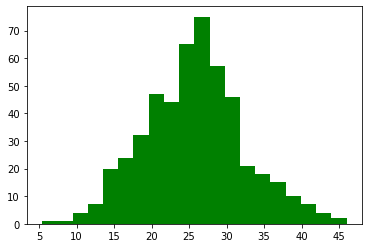

In [70]:
%time plt.hist(run_mcs(), bins=20, color='g')
plt.show()

In [71]:
# key inputs from DCF model
years = 5
starting_sales = 31.0
capex_percent = depr_percent = 0.032
sales_growth = 0.1
ebitda_margin =0.14
nwc_percent = 0.24
tax_rate = 0.25
#DCF assumptions
r = 0.12
g = 0.02
# For MCS model
iterations = 500
sales_std_dev = 0.01
ebitda_std_dev = 0.02
nwc_std_dev = 0.01


In [75]:
def run_mcs():
    
    #generate probability distributions
    sales_growth_dist = np.random.normal(loc=sales_growth,
                                         scale=sales_std_dev,
                                         size=(years, iterations))
    ebitda_margin_dist = np.random.normal(loc=ebitda_margin,
                                          scale=ebitda_std_dev,
                                          size=(years, iterations))
    nwc_percent_dist = np.random.normal(loc=nwc_percent,
                                       scale=nwc_std_dev,
                                       size=(years, iterations))
    
    #Calculate free cash flow
    sales_growth_dist += 1
    for i in range(1, len(sales_growth_dist)):
        sales_growth_dist[i] *= sales_growth_dist[i-1]
    sales = sales_growth_dist * starting_sales
    ebitda = sales * ebitda_margin_dist
    ebit = ebitda - (sales * depr_percent)
    tax = -(ebit * tax_rate)
    np.clip(tax, a_min=None, a_max=0)
    nwc = nwc_percent_dist * sales
    starting_nwc = starting_sales * nwc_percent
    prev_year_nwc = np.roll(nwc, 1, axis=0)
    prev_year_nwc[0] = starting_nwc
    delta_nwc = prev_year_nwc - nwc
    capex = -(sales * capex_percent)
    free_cash_flow = ebitda + tax + delta_nwc + capex
    #Discount cash flows to get DCF value
    terminal_value = free_cash_flow[-1] * (1 + g) / (r - g)
    discount_rates = [(1/ (1 + r)) ** i for i in range (1,6)]
    dcf_value = sum((free_cash_flow.T * discount_rates).T)
    dcf_value += terminal_value * discount_rates[-1]
    
    return dcf_value
    

CPU times: user 38.1 ms, sys: 2.68 ms, total: 40.8 ms
Wall time: 38.2 ms


<function matplotlib.pyplot.show(close=None, block=None)>

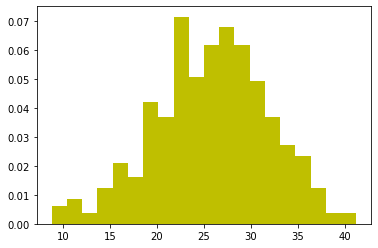

In [76]:
%time plt.hist(run_mcs(), bins=20, density=True, color="y")
plt.show